# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# with zipfile.ZipFile("./archive.zip") as z:
#     with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
#         df = pd.read_csv(f, parse_dates=["dt"])

df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [2]:
df_new = df[df.dt >= "1950-01-01"]
df_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

In [3]:
df_new.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [4]:
# change the dt column to datetime
df_new["dt"] = pd.to_datetime(df_new["dt"])
df_new.dtypes

/var/folders/89/q6t8y6z56vl91ct9zt_gb56h0000gn/T/ipykernel_2208/307827556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["dt"] = pd.to_datetime(df_new["dt"])


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [5]:
import seaborn as sns

df_new["year"] = df_new["dt"].dt.year  # add a column for year
average_temperature_by_year = df_new[df_new.City == "Toronto"].groupby('year').AverageTemperature.mean().reset_index()
average_temperature_by_year.head()


/var/folders/89/q6t8y6z56vl91ct9zt_gb56h0000gn/T/ipykernel_2208/328407109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["year"] = df_new["dt"].dt.year  # add a column for year


,year,AverageTemperature
0,1950,5.639583
1,1951,6.259083
2,1952,7.013417
3,1953,7.506250
4,1954,6.243083


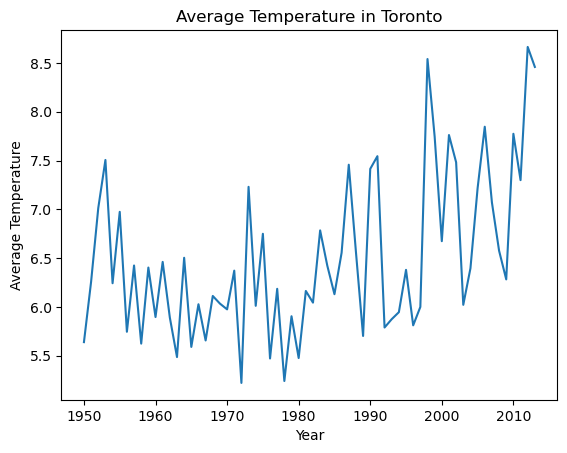

In [6]:
plt.plot(average_temperature_by_year.year, average_temperature_by_year.AverageTemperature)
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Average Temperature in Toronto")
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [7]:
temperature_var = df_new.groupby('City').AverageTemperature.var().reset_index()
print(*temperature_var[temperature_var.AverageTemperature == max(temperature_var.AverageTemperature)]["City"])

Harbin


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [8]:
latitude_var = df_new.groupby('Latitude').AverageTemperature.var().reset_index()  #.sort_values('Latitude')
latitude_var.head()

,Latitude,AverageTemperature
0,0.80N,0.385006
1,0.80S,1.113127
2,10.45N,1.151285
3,12.05N,6.781689
4,12.05S,7.281631


In [9]:
avg_temp_latitude_01_1975 = df_new[(df_new.dt.dt.month == 1) & (df_new.dt.dt.year == 1975)].groupby('Latitude').AverageTemperature.mean().reset_index()
avg_temp_latitude_01_1975.head()

,Latitude,AverageTemperature
0,0.80N,26.2290
1,0.80S,16.9910
2,10.45N,26.5990
3,12.05N,20.7455
4,12.05S,19.6010


In [10]:
avg_temp_latitude_07_1975 = df_new[(df_new.dt.dt.month == 7) & (df_new.dt.dt.year == 1975)].groupby('Latitude').AverageTemperature.mean().reset_index()
avg_temp_latitude_07_1975.head()

,Latitude,AverageTemperature
0,0.80N,26.4130
1,0.80S,14.8510
2,10.45N,28.4000
3,12.05N,24.9835
4,12.05S,13.8880


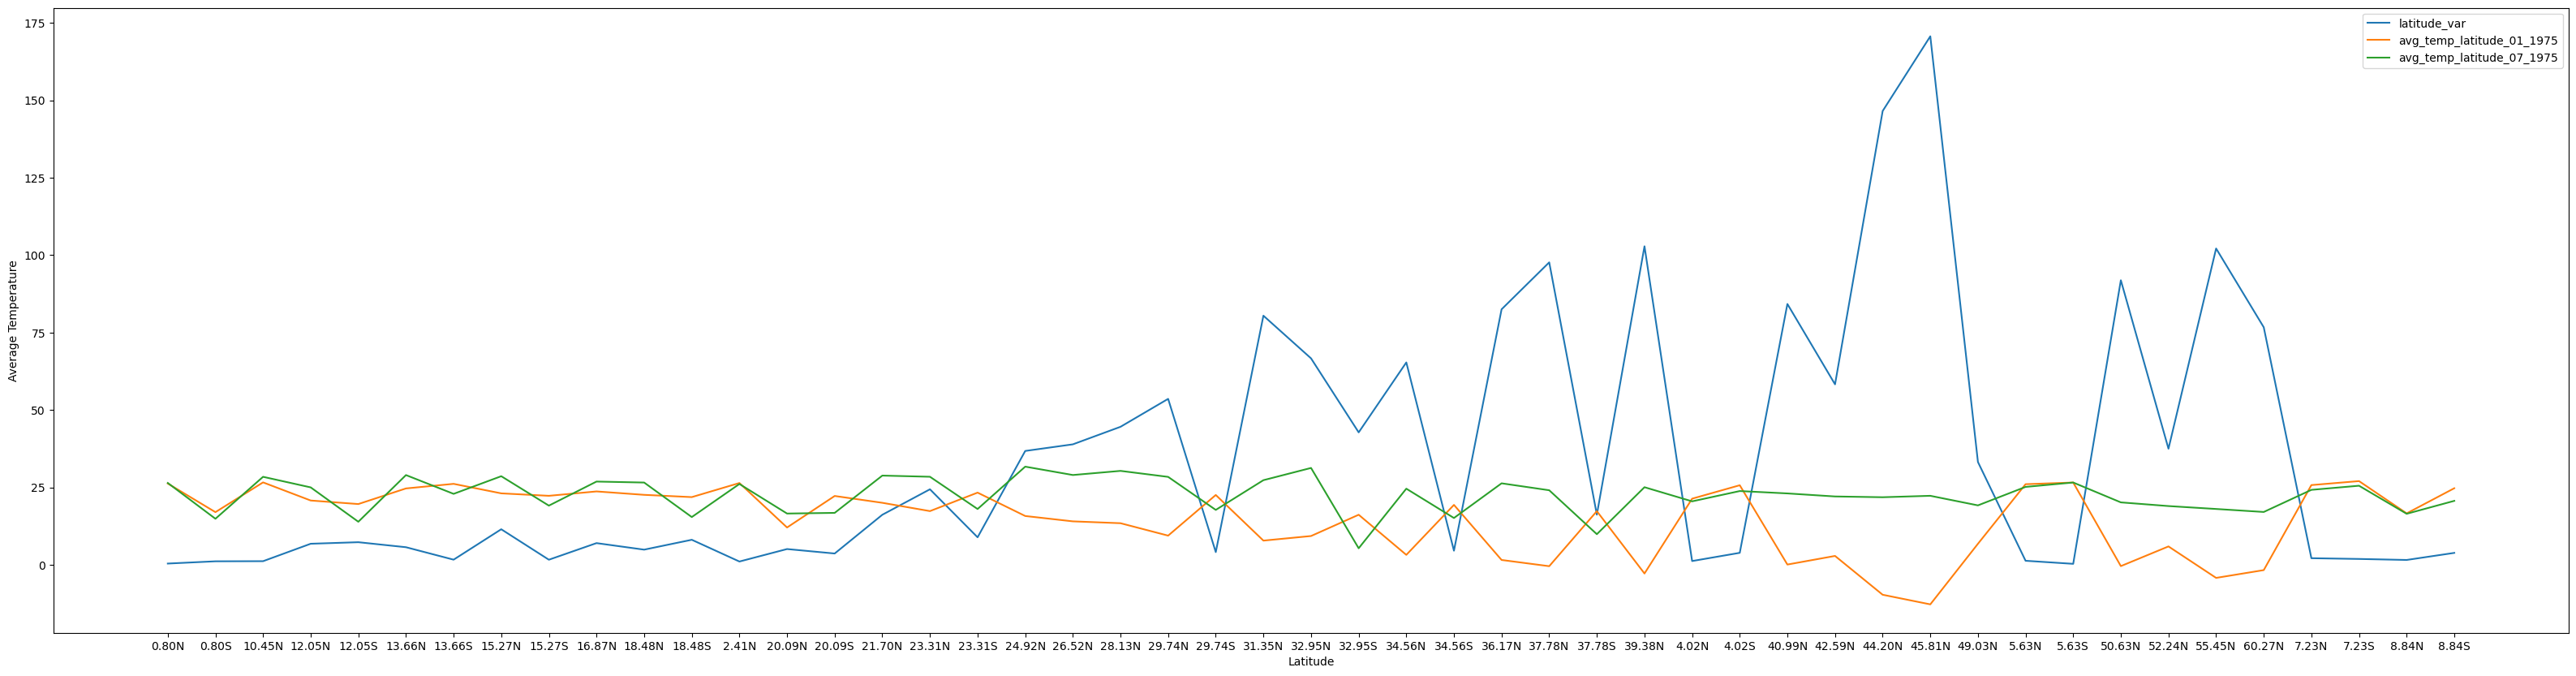

In [11]:
figure, axes = plt.subplots(1, 1, figsize=(40, 10))
# plt.figure(figsize=(20, 10))
plt.plot(latitude_var.Latitude, latitude_var.AverageTemperature, label="latitude_var")
plt.plot(latitude_var.Latitude, avg_temp_latitude_01_1975.AverageTemperature, label="avg_temp_latitude_01_1975")
plt.plot(latitude_var.Latitude, avg_temp_latitude_07_1975.AverageTemperature, label="avg_temp_latitude_07_1975")

plt.xlabel("Latitude")
plt.ylabel("Average Temperature")
plt.legend()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [12]:
df_new.City.unique()


array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [13]:
average_temperature_by_year_SPB = df_new[df_new.City == "Saint Petersburg"].groupby('year').AverageTemperature.mean().reset_index()
average_temperature_by_year_SPB.head()

,year,AverageTemperature
0,1950,4.424083
1,1951,4.308250
2,1952,3.749333
3,1953,4.840083
4,1954,4.454000


In [14]:
average_temperature_by_year_SPB['Delta1'] = average_temperature_by_year_SPB['AverageTemperature'] - average_temperature_by_year_SPB['AverageTemperature'].shift(1)
average_temperature_by_year_SPB.head()

,year,AverageTemperature,Delta1
0,1950,4.424083,NaN
1,1951,4.308250,-0.115833
2,1952,3.749333,-0.558917
3,1953,4.840083,1.090750
4,1954,4.454000,-0.386083


In [15]:
average_temperature_by_year_SPB['Delta2'] = average_temperature_by_year_SPB['AverageTemperature'] - average_temperature_by_year_SPB['AverageTemperature'].shift(-1)
average_temperature_by_year_SPB.head()

,year,AverageTemperature,Delta1,Delta2
0,1950,4.424083,NaN,0.115833
1,1951,4.308250,-0.115833,0.558917
2,1952,3.749333,-0.558917,-1.090750
3,1953,4.840083,1.090750,0.386083
4,1954,4.454000,-0.386083,1.452333


In [16]:
average_temperature_by_year_SPB['warm_years'] = average_temperature_by_year_SPB[(average_temperature_by_year_SPB.Delta1>0) & (average_temperature_by_year_SPB.Delta2>0)].AverageTemperature
# average_temperature_by_year_SPB['warm_years'] = average_temperature_by_year_SPB['warm_years'].fillna(0)

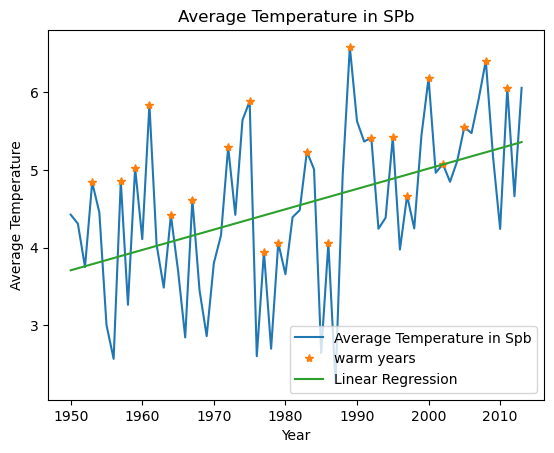

In [17]:
plt.plot(average_temperature_by_year_SPB.year, average_temperature_by_year_SPB.AverageTemperature, label='Average Temperature in Spb')

plt.plot(average_temperature_by_year_SPB.year, average_temperature_by_year_SPB.warm_years, '*', label='warm years')

from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(average_temperature_by_year_SPB.year).reshape(-1, 1)
y = np.array(average_temperature_by_year_SPB.AverageTemperature)  # .reshape(-1, 1)
lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)

plt.plot(average_temperature_by_year_SPB.year, y_pred, label='Linear Regression')

plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Average Temperature in SPb")
plt.legend()
plt.show()


# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [18]:
# 1
df361 = df_new.groupby(['City', 'year']).AverageTemperature.mean().reset_index()
df361_max_temp = df361.groupby('City').AverageTemperature.max().reset_index()
df361_min_temp = df361.groupby('City').AverageTemperature.min().reset_index()
df361_max_temp['diff_temp'] = df361_max_temp.AverageTemperature - df361_min_temp.AverageTemperature
print(*df361_max_temp[df361_max_temp.diff_temp == max(df361_max_temp.diff_temp)]["City"])

Mashhad


In [19]:
# 2 
city = (df_new[df_new.dt.dt.month == 1]).copy(deep=True)
city['df_diff'] = abs(np.array((df_new[df_new.dt.dt.month == 1])['AverageTemperature']) - np.array((df_new[df_new.dt.dt.month == 7])['AverageTemperature']))
city = city.groupby('City')['df_diff'].mean().reset_index()
print(*city[city['df_diff'] == max(city['df_diff'])].City)

Harbin


In [20]:
# 3
below_zero = df_new[df_new.AverageTemperature < 0].groupby(['City', 'year']).AverageTemperature.count().reset_index()
below_zero = below_zero.rename(columns = {'AverageTemperature':'month_count'})
below_zero = below_zero.groupby('City').month_count.mean().reset_index()
below_zero.head()
print(*below_zero.City[below_zero.month_count == max(below_zero.month_count)])

Harbin


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [21]:
# TODO: convert latitude and longitude to float, count average temperature for each city in last 10 years
# TODO: add data types
# {'N':1, 'S':-1, 'E': 1, 'W':-1}
def convert_lat_lon_to_float(lat_lon):
    if lat_lon[-1] in ['N', 'E']:
        return float(lat_lon[:-1])
    else:
        return -float(lat_lon[:-1])

df_new['Latitude'] = df_new['Latitude'].apply(convert_lat_lon_to_float)
df_new['Longitude'] = df_new['Longitude'].apply(convert_lat_lon_to_float)
df_new.head()

/var/folders/89/q6t8y6z56vl91ct9zt_gb56h0000gn/T/ipykernel_2208/633022441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Latitude'] = df_new['Latitude'].apply(convert_lat_lon_to_float)
/var/folders/89/q6t8y6z56vl91ct9zt_gb56h0000gn/T/ipykernel_2208/633022441.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Longitude'] = df_new['Longitude'].apply(convert_lat_lon_to_float)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63,-3.23,1950
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63,-3.23,1950
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63,-3.23,1950
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63,-3.23,1950
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63,-3.23,1950


In [22]:
df_geo = df_new[(df_new.year >= 2004) & (df_new.dt.dt.month == 1)]
df_geo = df_geo.groupby(['City', 'Latitude', 'Longitude']).AverageTemperature.mean().reset_index()
df_geo.head()

,City,Latitude,Longitude,AverageTemperature
0,Abidjan,5.63,-3.23,27.2830
1,Addis Abeba,8.84,38.11,18.2239
2,Ahmadabad,23.31,72.52,19.9577
3,Aleppo,36.17,37.79,5.9257
4,Alexandria,31.35,30.16,14.8218


In [24]:
import plotly.express as px 

fig = px.scatter_geo(df_geo, lat="Latitude", lon="Longitude", color="AverageTemperature", title="Average January Temperature in Cities for the last 10 years", hover_name='City')
fig.show()

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*